In [9]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
# carga dos dados
tit_train = pd.read_csv('titanic_train.csv')

In [11]:
tit_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Análise exploratória dos dados

<AxesSubplot:>

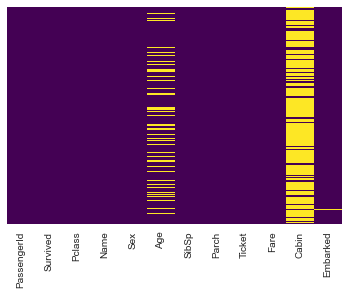

In [12]:
# verificação dos dados ausentes
sns.heatmap(tit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

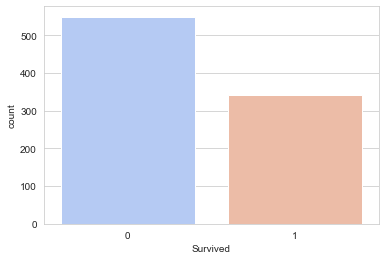

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=tit_train,palette='coolwarm')

<AxesSubplot:xlabel='Survived', ylabel='count'>

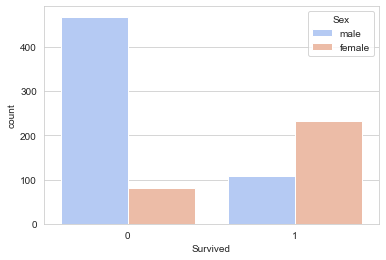

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=tit_train,palette='coolwarm')

<AxesSubplot:xlabel='Survived', ylabel='count'>

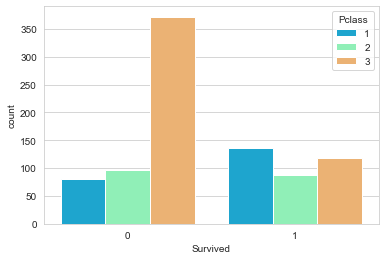

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=tit_train,palette='rainbow')

<AxesSubplot:>

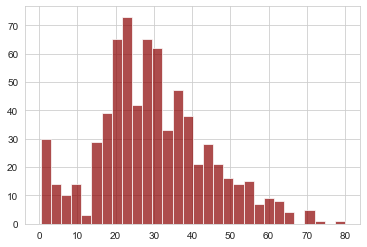

In [16]:
tit_train['Age'].hist(bins=30,color='darkred',alpha=0.7)

<AxesSubplot:xlabel='Age', ylabel='Count'>

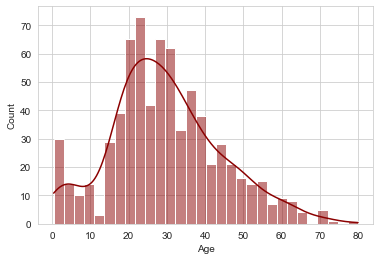

In [22]:
sns.histplot(tit_train['Age'].dropna(),kde=True,color='darkred',bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

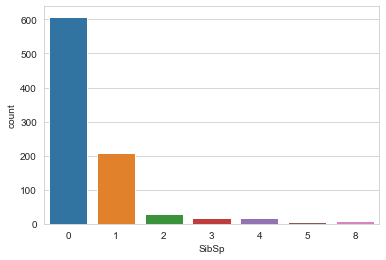

In [23]:
sns.countplot(x='SibSp',data=tit_train)

<AxesSubplot:>

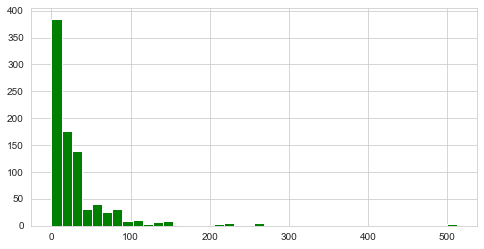

In [24]:
tit_train['Fare'].hist(color='green',bins=40,figsize=(8,4))

### Preparação dos dados (preenchimento de NaN, exclusão de linhas com dados faltantes, ...)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

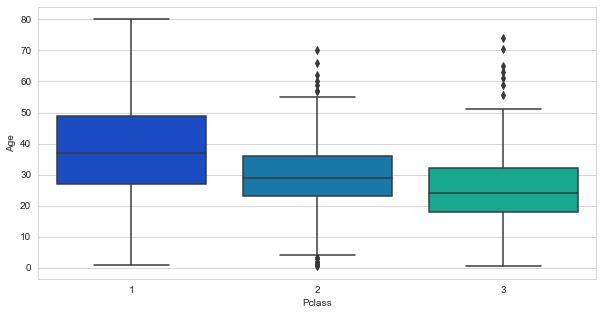

In [27]:
### Limpando os dados
plt.figure(figsize=(10, 5))
sns.boxplot(x='Pclass',y='Age',data=tit_train,palette='winter')

Podemos ver os passageiros mais ricos nas (que estão nas classes superiores) tendem a ser mais velhos, o que faz sentido. Usaremos esses valores de idade média para imputar com base em Pclass for Age.

In [29]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    
tit_train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

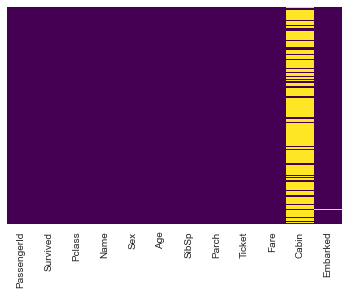

In [30]:
# verificando novamente o mapa de calor da idade
sns.heatmap(tit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
# exclusão da coluna Cabin, pois falta muitos dados
tit_train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

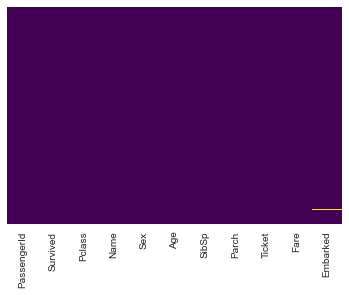

In [32]:
# verificando novamente o mapa de calor
sns.heatmap(tit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [47]:
# exclusão de linha com valor NaN
tit_train.dropna(inplace=True)

<AxesSubplot:>

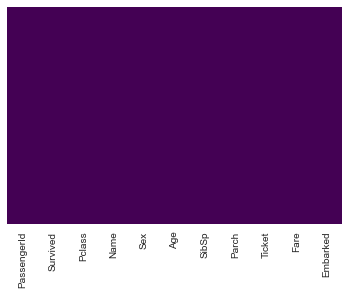

In [48]:
# verificando novamente o mapa de calor
sns.heatmap(tit_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
# conversão de dados categóricos em variáveis dummy
sex = pd.get_dummies(tit_train['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(tit_train['Embarked'],drop_first=True)

In [54]:
tit_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [55]:
tit_train = pd.concat([tit_train,sex,embark],axis=1)

In [56]:
tit_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Construção do modelo de Regressão Logística

#### Divisão dos dados em treino e teste

In [59]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(tit_train.drop('Survived',axis=1), 
                                                    tit_train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [64]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,808,3,18.0,0,0,7.775,0,0,1
651,652,2,18.0,0,1,23.000,0,0,1
2,3,3,26.0,0,0,7.925,0,0,1
690,691,1,31.0,1,0,57.000,1,0,1
196,197,3,24.0,0,0,7.750,1,1,0


In [65]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,512,3,24.0,0,0,8.05,1,0,1
613,614,3,24.0,0,0,7.75,1,1,0
615,616,2,24.0,1,2,65.00,0,0,1
337,338,1,41.0,0,0,134.50,0,0,0
718,719,3,24.0,0,0,15.50,1,1,0


In [66]:
y_train.head()

807    0
651    1
2      1
690    1
196    0
Name: Survived, dtype: int64

In [67]:
y_test.head()

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

#### Treinamento e Predição

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
#logmodel = LogisticRegression()
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
logmodel.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', random_state=0, solver='liblinear')

In [87]:
predictions = logmodel.predict(X_test)

### Avaliação do modelo

Podemos verificar a precisão, o recall e a pontuação f1 usando o relatório de classificação!

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

